In [1]:
import numpy as np
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
#loading the Airfare dataset and diving to two separate dataframes
Airfare = pd.read_table("http://www.stat.ufl.edu/~winner/data/airq402.dat", delim_whitespace=True, names=('Ci1', 'Ct2', 'AF1', 'Dist', 'AWP', 'MLA', 'MS1', 'AF2', 'LPA', 'MS2', 'price'))
XAirfare = Airfare.iloc[:,:-1]
YAirfare = pd.DataFrame(Airfare, columns=['price'])
#converting the non numeric to numeric values using pandas.get_dummies
XAirfare = pd.get_dummies(XAirfare)
print(XAirfare.shape)

(1000, 216)


In [2]:
#Adding Bias as predictor variables
bias = pd.DataFrame(1, index=np.arange(len(XAirfare)), columns=['bias'])
XAirfare = np.concatenate((bias,XAirfare),axis=1)
#diving the dataframe to training and testing sets
np.random.seed(0)
msk = np.random.rand(len(XAirfare)) < 0.8
X_train = XAirfare[msk]
X_test = XAirfare[~msk]
Y_train = YAirfare[msk]
Y_test = YAirfare[~msk]
#initializing the random parameter coefficients
#beta = np.random.rand(X_train.shape[1],1)
beta = np.full((X_train.shape[1],1),0.09)

In [3]:
def rmse(x,y,theta):
    hypothesis = np.dot(x,theta)
    cost = np.average((y-hypothesis) ** 2)
    rmse_value = (math.sqrt(cost))
    return rmse_value

In [4]:
def armijo(RSS, x, y, theta, delta, gradient):

    alpha = 1.0
    #RSS2 is my f(x + αd) ,RSS is my f(x) and result is αδdT d 
    RSS2 = np.sum((y - np.dot(x,(theta - alpha * gradient)))**2)
    result = alpha * delta * ((np.dot(gradient.T,gradient)).flatten())
    #checking the condition that f(x + αd) > f(x) - αδdT d if it is true we divide alpha by 2 and check for the condition again
    #we repeat this process till the condition breaks here delta ranges between 0 and 1.
    while np.all(RSS2 > RSS-result):
        alpha = alpha/2
        RSS2 =  np.sum((y - np.dot(x,(theta - alpha * gradient)))**2)
        result = alpha * delta * ((np.dot(gradient.T,gradient)).flatten())  
    return alpha

In [5]:
# Gradient Descent with armijo
def gradientDescent_ar(x, y, theta,alpha, numIterations,RMSE):
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        RSS = np.sum((hypothesis-y)**2)
        loss = hypothesis-y
        gradient = np.dot(x.T, loss)
        x_ar = x
        y_ar = y
        gr =gradient
        # passing the values to armijo to get the computed alpha which helps in finding the optimal solution in less number of steps.
        alpha = armijo(RSS, x, y, theta, 0.5, gr)  
        # update
        theta = theta - alpha * gradient
        rmse_value = rmse(x,y,theta)
        RMSE = np.append(RMSE,rmse_value)    
    return theta,RMSE



In [6]:
train_RMSE=[]
test_RMSE =[]
numIterations= 400
alpha = 0.00059

beta,train_RMSE = gradientDescent_ar(X_train, Y_train, beta, alpha, numIterations,train_RMSE)
#beta,test_RMSE = gradientDescent(X_test, Y_test, beta, alpha, numIterations,test_RMSE)
print(train_RMSE)

[64.41951666 51.22476716 46.52581246 44.88097332 44.20927848 43.83569922
 43.41607458 43.0907711  42.72913851 42.39652763 42.06799094 41.72481405
 41.43190818 41.07501993 40.82107958 40.44684928 40.23582097 39.84004817
 39.5856595  39.31008694 38.73166462 38.43538504 38.19625264 37.8876777
 37.68304759 37.35896876 37.14349918 36.85085324 36.38897543 36.14328385
 35.92229445 35.66811416 35.4748974  35.20978627 35.04688902 34.7680329
 34.58581402 34.36242948 33.96143399 33.75232083 33.57368273 33.35705881
 33.20265401 32.97638954 32.84841223 32.61005743 32.45702324 32.29025776
 31.94447462 31.76768789 31.62474338 31.44135846 31.31938054 31.12755352
 31.00012749 30.82620669 30.55492876 30.41083003 30.28096663 30.13249119
 30.01927237 29.86503535 29.76980274 29.60821875 29.50269208 29.37227234
 29.1417136  29.02160939 28.91866253 28.79473734 28.70596115 28.57702998
 28.50355663 28.36826517 28.28141073 28.18553213 27.99075518 27.89122597
 27.81031902 27.70746601 27.63852757 27.53134297 27.4

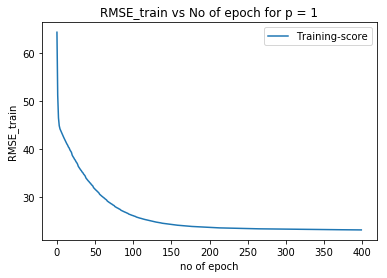

In [7]:
epoch = np.arange(0,numIterations)
plt.plot(epoch,train_RMSE)
plt.ylabel("RMSE_train")
plt.xlabel("no of epoch")
plt.title("RMSE_train vs No of epoch for p = 1")
plt.legend(['Training-score'], loc='upper right')
plt.show()